import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
tf.get_logger().setLevel('ERROR')

load data

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
y = tf.keras.utils.to_categorical(y, num_classes=2)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

build model

In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(X.shape[1],), activation='relu'))  # 30 neurons
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output classes
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


test model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

evaluate performance

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")


Test Accuracy: 0.97


accuracy graph

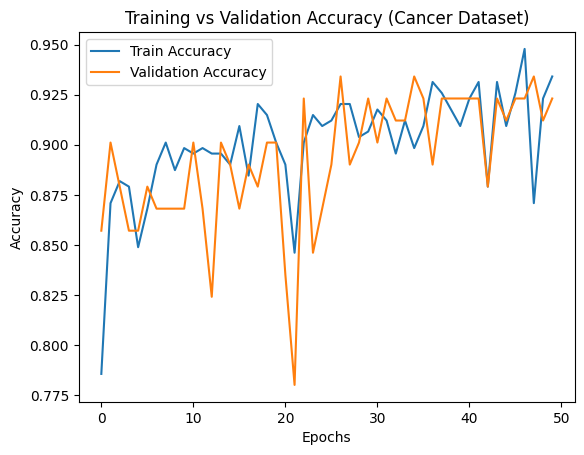

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy (Cancer Dataset)")
plt.show()

Import necessary libraries

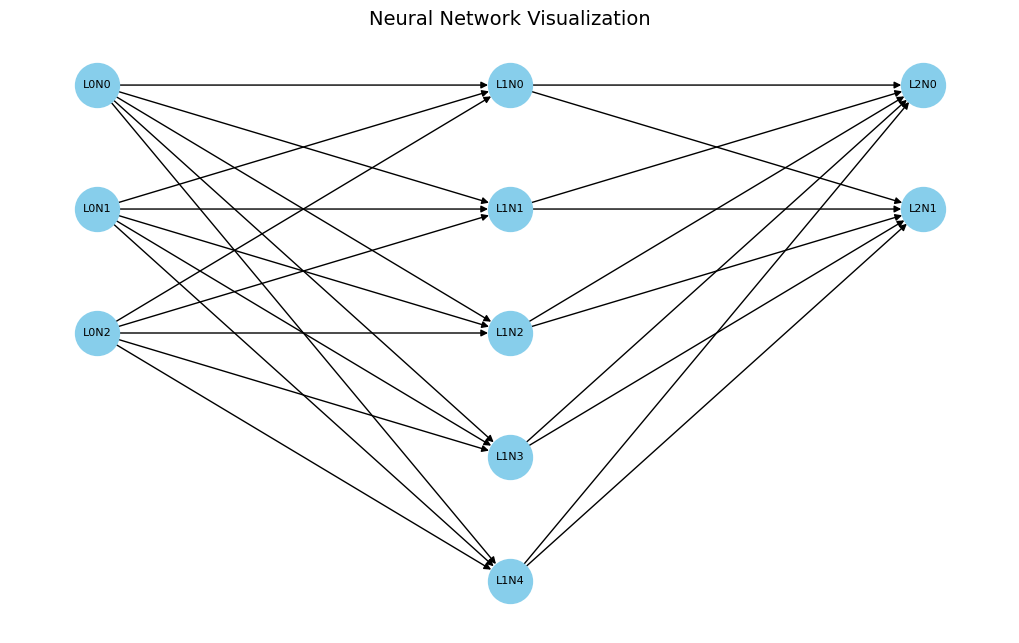

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_net(layers):
    """
    Draw a simple neural network diagram.
    layers: list containing number of nodes in each layer, e.g. [3, 5, 2]
    """
    G = nx.DiGraph()

    pos = {}
    node_count = 0

    # Build graph layer by layer
    for layer_idx, layer_size in enumerate(layers):
        for node_idx in range(layer_size):
            node_name = f"L{layer_idx}N{node_idx}"
            pos[node_name] = (layer_idx, -node_idx)
            G.add_node(node_name, layer=layer_idx)

            if layer_idx > 0:
                for prev_idx in range(layers[layer_idx - 1]):
                    prev_node = f"L{layer_idx-1}N{prev_idx}"
                    G.add_edge(prev_node, node_name)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8, arrows=True)
    plt.title("Neural Network Visualization", fontsize=14)
    plt.show()

draw_neural_net([3, 5, 2])
